# Jed data

'/home/rum/Desktop/suite2pJed/! 2-p at 124 zooms'

The description of the outputs can be found [here](https://github.com/MouseLand/suite2p/blob/c88e1ba3aa2013fe379e64c7e45ae73a417eb4a7/docs/outputs.rst#L12)

Additional type of outputs/visualization can be found [here](https://github.com/MouseLand/suite2p/tree/c88e1ba3aa2013fe379e64c7e45ae73a417eb4a7/jupyter) and especially the last section of this [notebook](https://github.com/MouseLand/suite2p/blob/c88e1ba3aa2013fe379e64c7e45ae73a417eb4a7/jupyter/Run%20Suite2p.ipynb)

In [1]:
import os, requests
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import suite2p

# Load the data from IDEAS platform

In [2]:
## load the data

# os.chdir('/home/rum/Desktop/suite2pJed/Diana IDS output/')
os.chdir('/home/rum/Desktop/suite2pJed/run_suite2p/suite2p/plane0')

F = np.load('F.npy', allow_pickle=True)
Fneu = np.load('Fneu.npy', allow_pickle=True)
spks = np.load('spks.npy', allow_pickle=True)
stat = np.load('stat.npy', allow_pickle=True)
ops =  np.load('ops.npy', allow_pickle=True)
ops = ops.item()
iscell = np.load('iscell.npy', allow_pickle=True)

In [3]:
print(f"The number of ROIs is: {len(stat)}")

The number of ROIs is: 52


In [4]:
for key, value in ops.items():
    print(f"{key}")
    print(f"{key}: {value}")

suite2p_version
suite2p_version: 0.14.4
look_one_level_down
look_one_level_down: False
fast_disk
fast_disk: /home/rum/Desktop/suite2pJed/run_suite2p
delete_bin
delete_bin: False
mesoscan
mesoscan: False
bruker
bruker: False
bruker_bidirectional
bruker_bidirectional: False
h5py
h5py: []
h5py_key
h5py_key: data
nwb_file
nwb_file: 
nwb_driver
nwb_driver: 
nwb_series
nwb_series: 
save_path0
save_path0: /home/rum/Desktop/suite2pJed/run_suite2p
save_folder
save_folder: suite2p
subfolders
subfolders: []
move_bin
move_bin: False
nplanes
nplanes: 1
nchannels
nchannels: 1
functional_chan
functional_chan: 1
tau
tau: 1.0
fs
fs: 10.0
force_sktiff
force_sktiff: False
frames_include
frames_include: -1
multiplane_parallel
multiplane_parallel: False
ignore_flyback
ignore_flyback: []
preclassify
preclassify: 0.0
save_mat
save_mat: False
save_NWB
save_NWB: False
combined
combined: True
aspect
aspect: 1.0
do_bidiphase
do_bidiphase: False
bidiphase
bidiphase: 0
bidi_corrected
bidi_corrected: False
do_regis

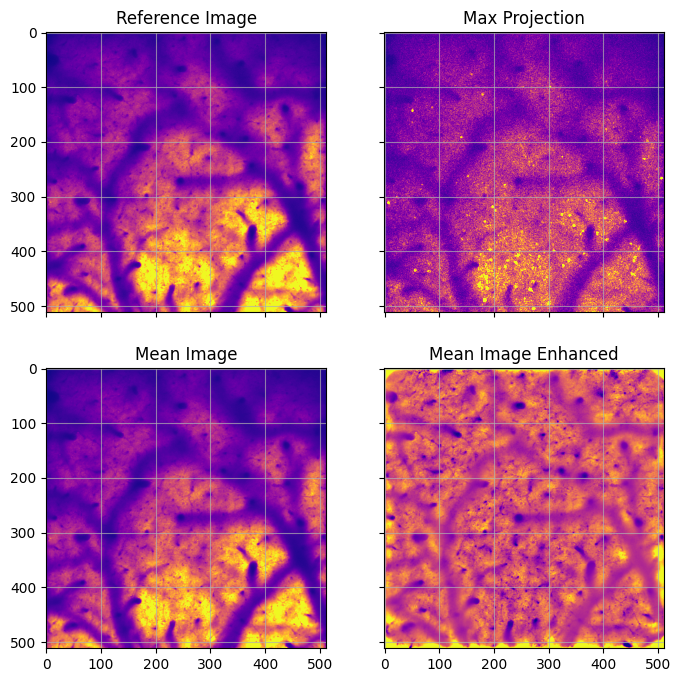

In [5]:

fig, ax  = plt.subplots(2,2, figsize = (8,8), sharex=True, sharey=True)
kwargs = {
    'cmap': plt.get_cmap('plasma'), #viridis
    # 'norm': LogNorm(vmin=0, vmax=np.max(ops['refImg'])*1000),
    # 'vmin': np.min(ops['refImg']),
    # 'vmax': np.max(ops['refImg']),
}

ax[0][0].imshow(ops['refImg'],  **kwargs, vmin= np.min(ops['max_proj']), vmax= np.max(ops['refImg'])/2)
ax[1][0].imshow(ops['meanImg'],  **kwargs,vmin= np.min(ops['max_proj']), vmax= np.max(ops['refImg'])/2)
ax[0][1].imshow(ops['max_proj'], **kwargs,vmin= np.min(ops['max_proj']), vmax= np.max(ops['max_proj'])/8)
ax[1][1].imshow(ops['meanImgE'], **kwargs,vmin= np.min(ops['meanImgE']), vmax= np.max(ops['meanImgE']))

axs_flattened = ax.ravel()
for axs in axs_flattened:
    # ax.grid(which='minor', linestyle='--', alpha=0.7)
    axs.grid(which='major', linestyle='-', alpha=0.7)
    axs.set_xlim(0,512)
    axs.set_ylim(512,0)
    axs.set_aspect('equal')
    axs.axis('image')

ax[0][0].set_title("Reference Image")
ax[1][0].set_title("Mean Image")
ax[0][1].set_title("Max Projection")
ax[1][1].set_title("Mean Image Enhanced")

plt.savefig('f1.png')

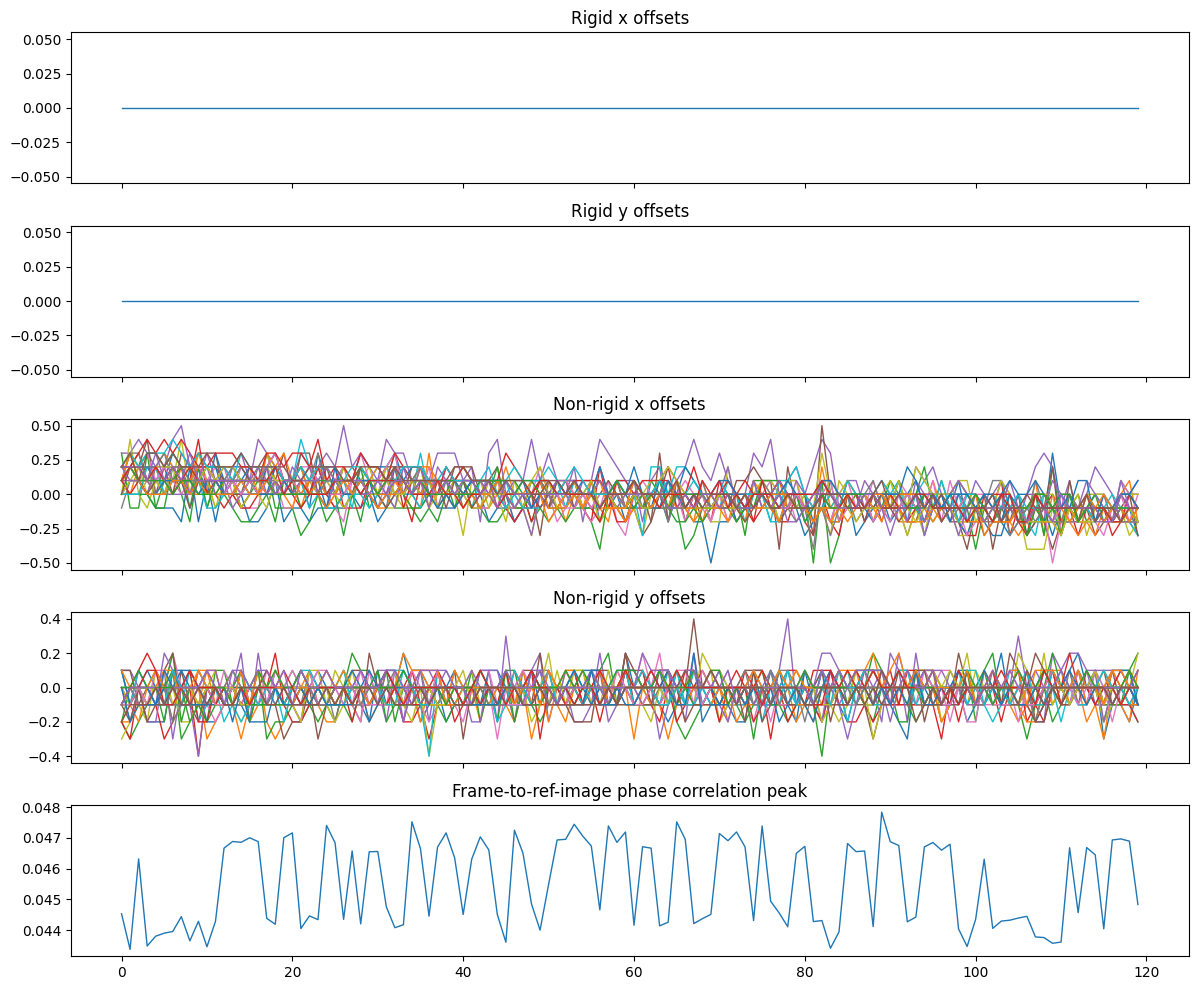

In [6]:
fig, ax = plt.subplots(5, sharex=True, figsize=(12,10))

kwargs = {'lw':1}

ax[0].plot(ops['xoff'], **kwargs)
ax[1].plot(ops['yoff'], **kwargs)
ax[2].plot(ops['xoff1'], **kwargs)
ax[3].plot(ops['yoff1'], **kwargs)
ax[4].plot(ops['corrXY'], **kwargs)

ax[0].set_title("Rigid x offsets")
ax[1].set_title("Rigid y offsets")
ax[2].set_title("Non-rigid x offsets")
ax[3].set_title("Non-rigid y offsets")
ax[4].set_title("Frame-to-ref-image phase correlation peak")

plt.tight_layout()
plt.savefig('f2.png')

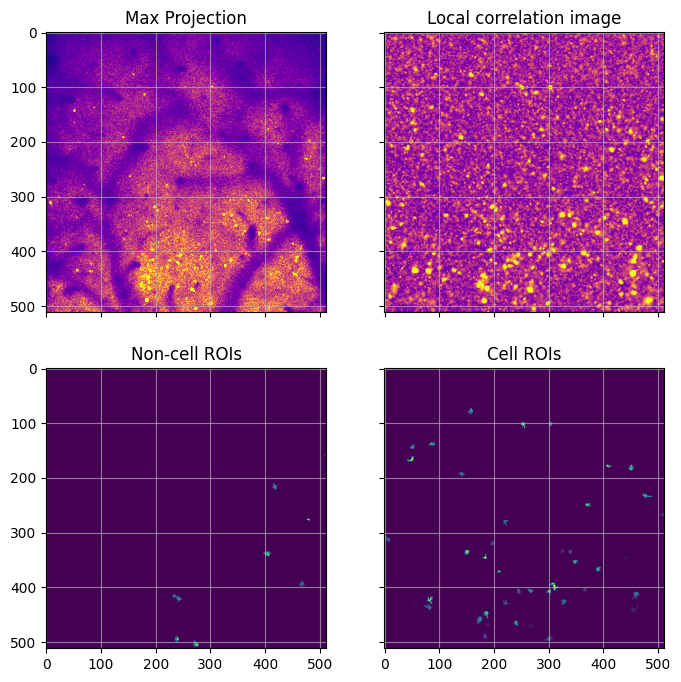

In [7]:
fig, ax  = plt.subplots(2,2, figsize = (8,8), sharex=True, sharey=True)
kwargs = {
    'cmap': plt.get_cmap('plasma'), #viridis
    # 'norm': LogNorm(vmin=0, vmax=np.max(ops['refImg'])*1000),
    # 'vmin': np.min(ops['refImg']),
    # 'vmax': np.max(ops['refImg']),
}

### create/initialize a blank array for placing cells
### TODO need to create a function for this
stat = np.load('stat.npy', allow_pickle=True)


### retrieve the index of cells and non-cells ROIs
cellROI = np.where(iscell[:, 0] ==1)
noncellROI = np.where(iscell[:, 0] ==0)

im_c = np.zeros((ops['Ly'], ops['Lx']))
for n in cellROI[0]:
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    im_c[ypix,xpix] = n+1

im_nc = np.zeros((ops['Ly'], ops['Lx']))
for n in noncellROI[0]:
    n = int(n)
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    im_nc[ypix,xpix] = n+1



ax[0][1].imshow(ops['Vcorr'], **kwargs,vmin= np.min(ops['Vcorr']), vmax= np.max(ops['Vcorr'])/3)
ax[0][0].imshow(ops['max_proj'], **kwargs,vmin= np.min(ops['max_proj']), vmax= np.max(ops['max_proj'])/8)
ax[1][1].imshow(im_c)
ax[1][0].imshow(im_nc)

axs_flattened = ax.ravel()
for axs in axs_flattened:
    # ax.grid(which='minor', linestyle='--', alpha=0.7)
    axs.grid(which='major', linestyle='-', alpha=0.7)
    axs.set_xlim(0,512)
    axs.set_ylim(512,0)
    axs.set_aspect('equal')
    axs.axis('image')

ax[0][1].set_title("Local correlation image")
ax[0][0].set_title("Max Projection")
ax[1][1].set_title("Cell ROIs")
ax[1][0].set_title("Non-cell ROIs")
plt.savefig('f3.png')

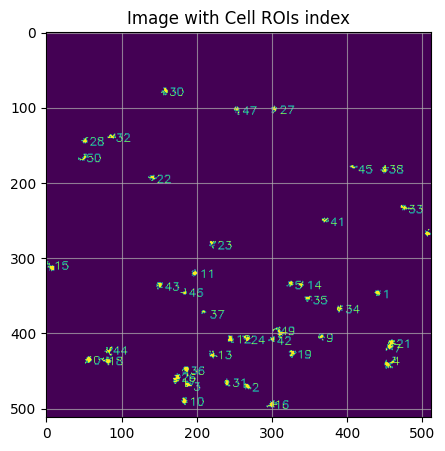

In [8]:
import cv2
import numpy as np

# Create a blank image
im_c = np.zeros((ops['Ly'], ops['Lx']))

for n in cellROI[0]:
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    im_c[ypix,xpix] = n+1
# print(im_c)

im_c[im_c != 0] =255
img = im_c

# print(np.unique(im_c))
# Define the font to use for labeling
font = cv2.FONT_HERSHEY_SIMPLEX

# Loop over the ROIs and add labels
for n in cellROI[0]:
    n = int(n)
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    
    # Draw a rectangle around the ROI
    # cv2.rectangle(img, (np.min(xpix)-2, np.min(ypix)-2), (np.max(xpix)+2, np.max(ypix)+2), (255, 255, 255), 1)
    
    # Add a label to the ROI
    label = f"{n}"
    cv2.putText(img, label, (np.min(xpix)+10, np.min(ypix)+10), font, 0.5, (255), 1)

fig, ax  = plt.subplots(1, figsize = (5,5), sharex=True, sharey=True)
ax.imshow(img)
ax.set_title('Image with Cell ROIs index')
# ax.grid(which='minor', linestyle='--', alpha=0.7)
ax.grid(which='major', linestyle='-', alpha=0.7)
ax.set_xlim(0,512)
ax.set_ylim(512,0)
ax.set_aspect('equal')
ax.axis('image')
plt.savefig('f4.png')

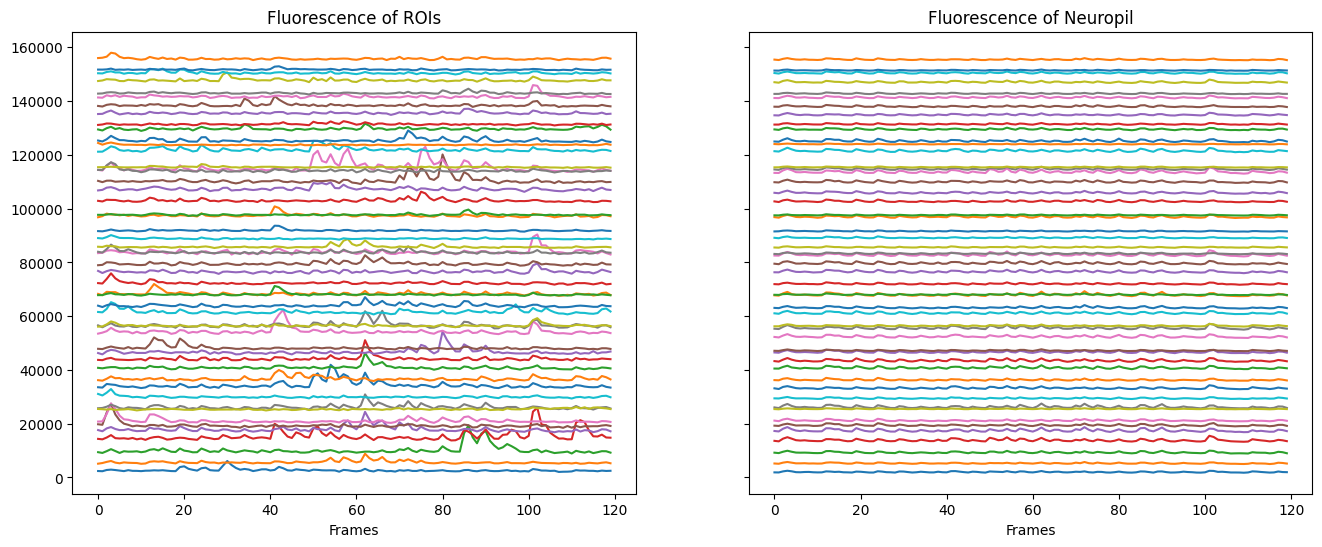

In [9]:
f, ax = plt.subplots(1,2, figsize = (16,6), sharex=True, sharey=True)
sf = 3000
for i, j in enumerate(F):
    ax[0].plot(F[i]+i*sf)
    ax[1].plot(Fneu[i]+i*sf)
for ii in ax:
    ii.set_xlabel("Frames")
ax[0].set_title("Fluorescence of ROIs")
ax[1].set_title("Fluorescence of Neuropil")
plt.savefig('f5.png')

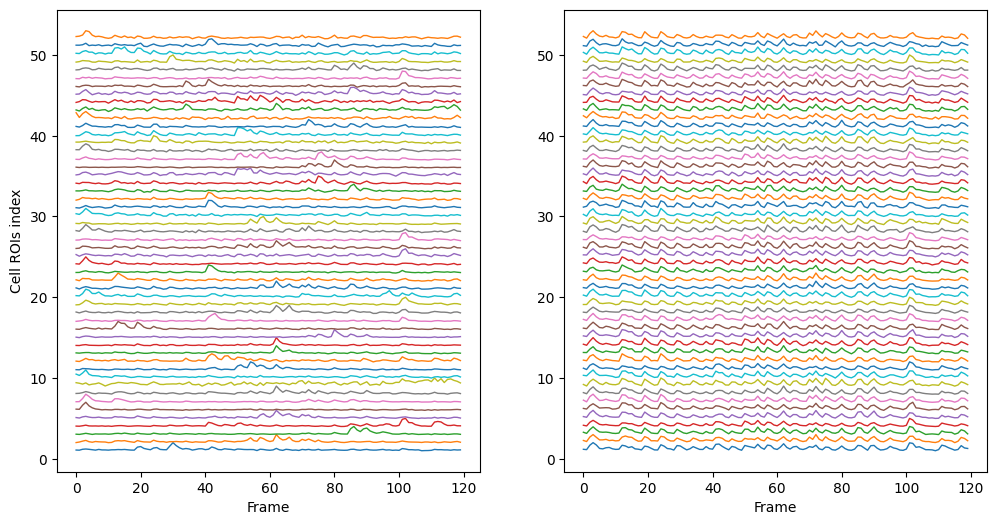

In [10]:
# Helper function to normalize each row to a specific range
def normalize_to_range(row, min_val, max_val):
    min_row = np.min(row)
    max_row = np.max(row)
    return (row - min_row) / (max_row - min_row) * (max_val - min_val) + min_val

f, ax = plt.subplots(1,2, figsize=(12,6))
# Plot the data with normalized y-values
for i, row in enumerate(F):
    # Normalize the row to range [i + 1, i + 2]
    normalized_y = normalize_to_range(row, i + 1, i + 2)
    ax[0].plot(normalized_y, lw=1)

for i, row in enumerate(Fneu):
    # Normalize the row to range [i + 1, i + 2]
    normalized_y = normalize_to_range(row, i + 1, i + 2)
    ax[1].plot(normalized_y, lw=1)
    
# Set labels and legend
ax[0].set_xlabel('Frame')
ax[1].set_xlabel('Frame')
ax[0].set_ylabel('Cell ROIs index')
plt.savefig('f6.png')

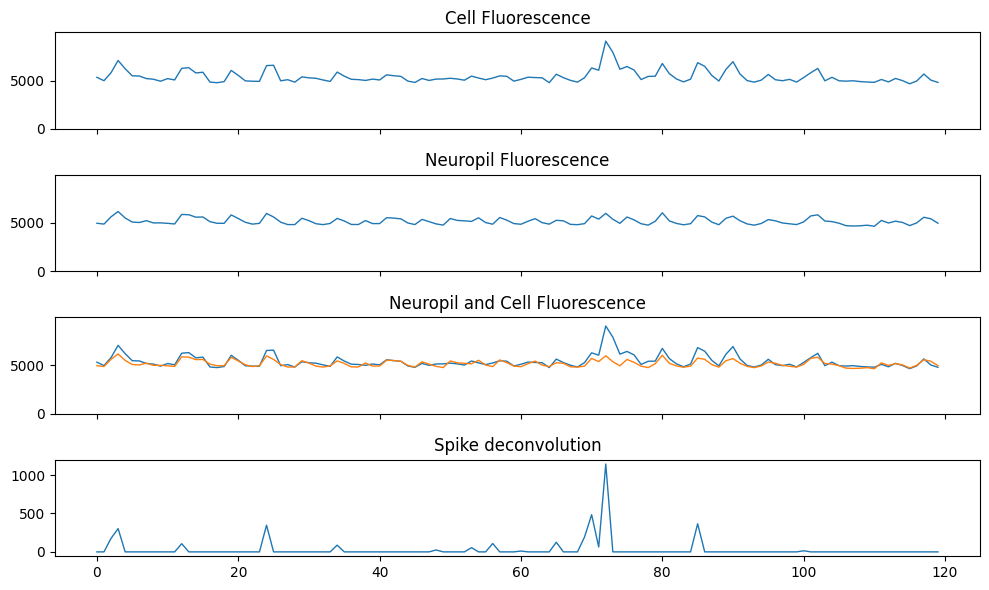

In [11]:
f, ax = plt.subplots(4,1, figsize=(10,6), sharex=True)
kwargs = {'lw':1}
cell_idx = 40

ax[0].set_title('Cell Fluorescence')
ax[0].plot(F[cell_idx], **kwargs)
ax[1].set_title('Neuropil Fluorescence')
ax[1].plot(Fneu[cell_idx], **kwargs)
ax[2].set_title('Neuropil and Cell Fluorescence')
ax[2].plot(F[cell_idx], **kwargs)
ax[2].plot(Fneu[cell_idx], **kwargs)
ax[3].set_title('Spike deconvolution')
ax[3].plot(spks[cell_idx], **kwargs)

for i in [0,1,2]:
    ax[i].set_ylim([0, np.max(F[cell_idx])*1.1])

plt.tight_layout()
plt.savefig('f7.png')

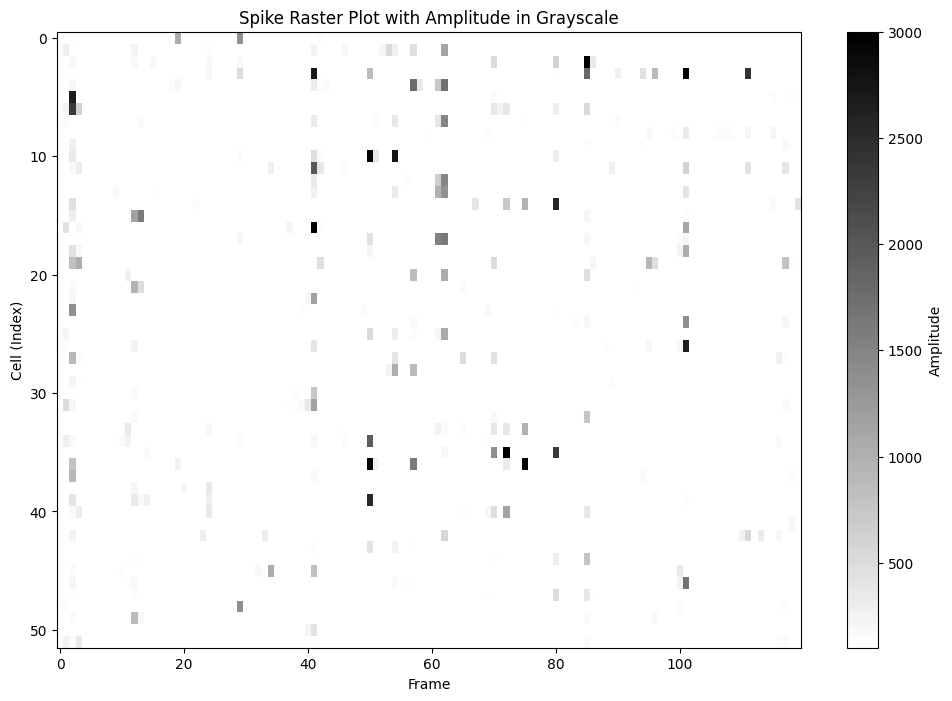

<Figure size 640x480 with 0 Axes>

In [12]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data using imshow. The cmap 'gray' uses darker shades for higher values.
cax = ax.imshow(spks, aspect='auto', cmap='gray_r', interpolation='nearest', vmin=100, vmax=3000)

# Set the labels and title
ax.set_xlabel('Frame')
ax.set_ylabel('Cell (Index)')
ax.set_title('Spike Raster Plot with Amplitude in Grayscale')

# Display the colorbar to understand amplitude to grayscale mapping
fig.colorbar(cax, ax=ax, label='Amplitude')

# Show the plot
plt.show()
plt.savefig('f8.png')

In [13]:
# also look at https://github.com/mouseland/rastermap for downstream implementation

In [14]:
os.getcwd()

'/home/rum/Desktop/suite2pJed/run_suite2p/suite2p/plane0'